In [6]:
# Step 1: Import required libraries
# -------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

Matplotlib is building the font cache; this may take a moment.


In [4]:
import os
import shutil

# kaggle.json file ka current path
source = r"C:\Users\ALC\.kaggle\kaggle.json"


destination = os.path.expanduser(r"~\.kaggle\kaggle.json")


os.makedirs(os.path.dirname(destination), exist_ok=True)

# file move karo
shutil.move(source, destination)

print("kaggle.json moved successfully!")


kaggle.json moved successfully!


In [7]:
!kaggle datasets list


ref                                                           title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset  Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000           7220        279  1.0              
jaderz/hospital-beds-management                               Hospital Beds Management                                47583  2025-10-03 09:21:58.590000           5829        162  1.0              
ahmadrazakashif/bmw-worldwide-sales-records-20102024          BMW Worldwide Sales Records (2010–2024)                853348  2025-09-20 14:39:45.280000          12022        263  1.0              
grandmaster07/s

In [14]:
# Step 3: Import libraries
import kaggle
import pandas as pd
import tempfile
import os
import shutil

# Step 4: Define dataset
dataset = 'ruchi798/data-science-job-salaries'

# Step 5: Create temporary directory and download dataset there
temp_dir = tempfile.mkdtemp()
!kaggle datasets download -d {dataset} -p {temp_dir} --unzip

# Step 6: Locate the required CSV file
csv_path = None
for file in os.listdir(temp_dir):
    if file.lower().endswith(".csv"):
        csv_path = os.path.join(temp_dir, file)
        print(f"✅ CSV File Found: {file}")
        break

if csv_path is None:
    raise FileNotFoundError("❌ CSV file not found in dataset!")

# Step 7: Load CSV into DataFrame
df = pd.read_csv(csv_path)

# Step 8: Verify data fetched successfully
print("\n✅ Data successfully fetched from Kaggle!\n")
print(f"Total rows: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")
print("\nFirst 5 rows of the dataset:\n")
display(df.head())

# Step 9 (Optional): Clean up temporary folder
# shutil.rmtree(temp_dir)

Dataset URL: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries
License(s): CC0-1.0

✅ CSV File Found: ds_salaries.csv

✅ Data successfully fetched from Kaggle!

Total rows: 607
Total columns: 12

First 5 rows of the dataset:




  0%|          | 0.00/7.37k [00:00<?, ?B/s]
100%|##########| 7.37k/7.37k [00:00<00:00, 2.03MB/s]


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [9]:
# Step 2: Load the dataset
# -------------------------------------------
df = pd.read_csv("Software Engineer Salaries.csv")

print("Rows & Columns:", df.shape)
df.head()

Rows & Columns: (870, 6)


,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)


In [10]:
# Step 3: Check missing data
# -------------------------------------------
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Company            2
Company Score     81
Job Title          0
Location          13
Date               0
Salary           106
dtype: int64


In [11]:
# Step 4: Remove duplicate rows
# -------------------------------------------
print("\nBefore removing duplicates:", df.shape)
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)


Before removing duplicates: (870, 6)
After removing duplicates: (870, 6)


In [12]:
# Step 5: Clean the Salary column (from text to numeric)
# -------------------------------------------
import re
def clean_salary(s):
    if pd.isna(s):
        return np.nan
    s = str(s)
    s = re.sub(r'\(.*?\)', '', s)  # remove text like (Glassdoor est.)
    s = s.replace('$', '').replace(',', '').replace('\xa0', '').strip()
    parts = s.split('-')
    nums = []
    for p in parts:
        match = re.search(r'(\d+)([kK]?)', p.strip())
        if match:
            val = float(match.group(1))
            if match.group(2).lower() == 'k':
                val *= 1000
            nums.append(val)
    if len(nums) == 1:
        return nums[0]
    elif len(nums) == 2:
        return sum(nums)/2
    else:
        return np.nan

df['Cleaned_Salary'] = df['Salary'].apply(clean_salary)

print("\nSample Cleaned Salaries:")
print(df[['Salary','Cleaned_Salary']].head(10))


Sample Cleaned Salaries:
                          Salary  Cleaned_Salary
0   $68K - $94K (Glassdoor est.)         81000.0
1   $61K - $104K (Employer est.)         82500.0
2  $95K - $118K (Glassdoor est.)        106500.0
3   $97K - $145K (Employer est.)        121000.0
4  $85K - $108K (Glassdoor est.)         96500.0
5  $123K - $175K (Employer est.)        149000.0
6   $77K - $94K (Glassdoor est.)         85500.0
7  $71K - $100K (Glassdoor est.)         85500.0
8  $94K - $148K (Glassdoor est.)        121000.0
9  $147K - $189K (Employer est.)        168000.0


In [13]:
# Step 6: Handle Missing Values 
# -------------------------------------------
# Replace missing text data with defaults
df['Location'] = df['Location'].fillna('Unknown')
df['Job Title'] = df['Job Title'].fillna('Not Mentioned')

# Replace missing salary with mean of all salaries
df['Cleaned_Salary'] = df['Cleaned_Salary'].fillna(df['Cleaned_Salary'].mean())

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Company             2
Company Score      81
Job Title           0
Location            0
Date                0
Salary            106
Cleaned_Salary      0
dtype: int64


In [14]:
# Step 7: Verify and handle outliers (Winsorizing)
# -------------------------------------------
mean_sal = df['Cleaned_Salary'].mean()
std_sal = df['Cleaned_Salary'].std()

# Cap very high salaries beyond 3 standard deviations
df['Cleaned_Salary'] = np.where(
    df['Cleaned_Salary'] > mean_sal + 3*std_sal,
    mean_sal + 3*std_sal,
    df['Cleaned_Salary']
)

In [15]:
# Step 8: Feature Engineering
# -------------------------------------------
# Create Experience Level column based on salary
def experience_level(salary):
    if pd.isna(salary):
        return 'Unknown'
    elif salary < 70000:
        return 'Junior'
    elif salary < 120000:
        return 'Mid Level'
    else:
        return 'Senior'

df['Experience_Level'] = df['Cleaned_Salary'].apply(experience_level)

# Normalize salary (scaling like R's scale(distance))
df['Salary_Scaled'] = (df['Cleaned_Salary'] - df['Cleaned_Salary'].mean()) / df['Cleaned_Salary'].std()

# Example of a derived column (feature engineering)
df['Salary_Bonus'] = np.where(df['Experience_Level'] == 'Senior', df['Cleaned_Salary'] * 0.1, df['Cleaned_Salary'] * 0.05)

print("\nFeature Engineering done. Sample columns:")
print(df[['Cleaned_Salary','Experience_Level','Salary_Scaled','Salary_Bonus']].head(10))




Feature Engineering done. Sample columns:
   Cleaned_Salary Experience_Level  Salary_Scaled  Salary_Bonus
0         81000.0        Mid Level      -0.972012        4050.0
1         82500.0        Mid Level      -0.938472        4125.0
2        106500.0        Mid Level      -0.401830        5325.0
3        121000.0           Senior      -0.077608       12100.0
4         96500.0        Mid Level      -0.625431        4825.0
5        149000.0           Senior       0.548474       14900.0
6         85500.0        Mid Level      -0.871392        4275.0
7         85500.0        Mid Level      -0.871392        4275.0
8        121000.0           Senior      -0.077608       12100.0
9        168000.0           Senior       0.973316       16800.0


In [16]:
# Step 9: Data Summarization & Aggregation (like R group_by)
# -------------------------------------------
avg_by_exp = df.groupby('Experience_Level')['Cleaned_Salary'].mean().reset_index()
avg_by_loc = df.groupby('Location')['Cleaned_Salary'].mean().reset_index()

print("\nAverage Salary by Experience Level:")
print(avg_by_exp)
print("\nAverage Salary by Location:")
print(avg_by_loc.head())


Average Salary by Experience Level:
  Experience_Level  Cleaned_Salary
0           Junior    20564.192308
1        Mid Level    98793.388430
2           Senior   153046.213441

Average Salary by Location:
                      Location  Cleaned_Salary
0  Aberdeen Proving Ground, MD        132500.0
1             Agoura Hills, CA         80000.0
2                Aguadilla, PR        113000.0
3                    Aiken, SC         90000.0
4                      Alabama         89500.0


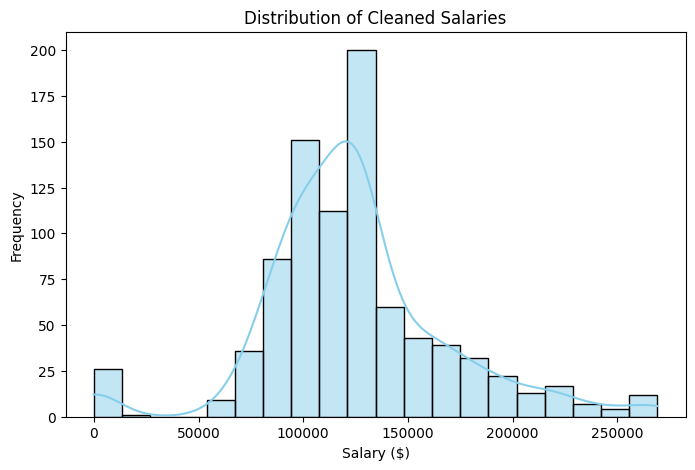

In [17]:
# Step 10: Data Visualization (R ggplot → Python matplotlib/seaborn)
# -------------------------------------------
import matplotlib.pyplot as plt
# 1. Histogram: Salary Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Cleaned_Salary'], bins=20, color='skyblue', kde=True)
plt.title("Distribution of Cleaned Salaries")
plt.xlabel("Salary ($)")
plt.ylabel("Frequency")
plt.show()

C:\Users\Al-Rayyan-Computer\AppData\Local\Temp\ipykernel_3780\3271556673.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Experience_Level', y='Cleaned_Salary', data=df, palette='Blues')


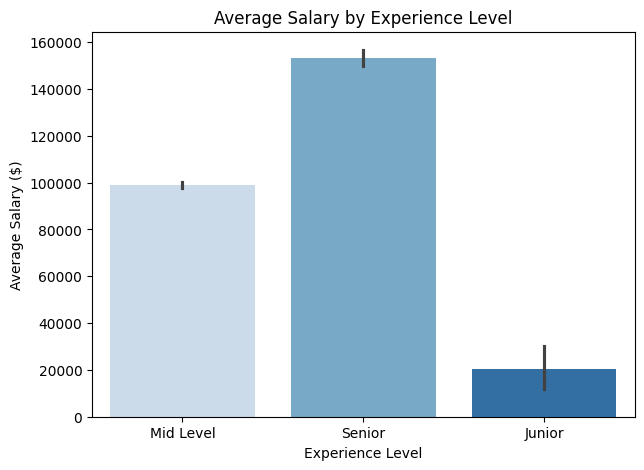

In [18]:
# 2. Bar Plot: Average Salary by Experience Level
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.barplot(x='Experience_Level', y='Cleaned_Salary', data=df, palette='Blues')
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary ($)")
plt.show()

C:\Users\Al-Rayyan-Computer\AppData\Local\Temp\ipykernel_3780\637315542.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Cleaned_Salary', data=df[df['Location'].isin(top_loc)], palette='Greens')


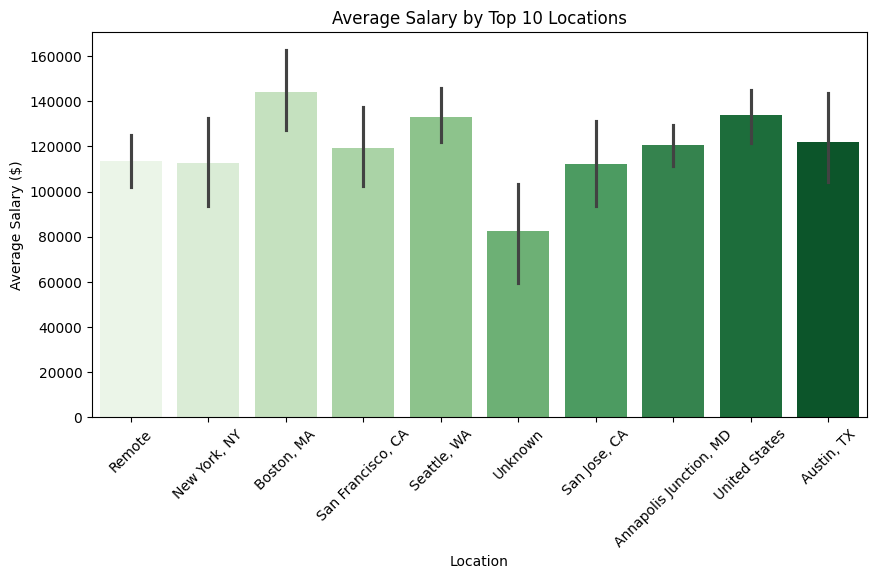

In [19]:
# 3. Bar Plot: Average Salary by Top 10 Locations
top_loc = df['Location'].value_counts().head(10).index
plt.figure(figsize=(10,5))
sns.barplot(x='Location', y='Cleaned_Salary', data=df[df['Location'].isin(top_loc)], palette='Greens')
plt.title("Average Salary by Top 10 Locations")
plt.xticks(rotation=45)
plt.ylabel("Average Salary ($)")
plt.show()

In [20]:
# Step 11: Save cleaned dataset
# -------------------------------------------
df.to_csv("Cleaned_Software_Engineer_Salaries-2.csv", index=False)
print("\n✅ Cleaned dataset saved successfully!")


✅ Cleaned dataset saved successfully!



 PHASE 2: EXPLORATORY DATA ANALYSIS


📌 BASIC STATISTICS:
count       870.000000
mean     124470.840678
std       44722.517496
min          15.000000
25%       99500.000000
50%      123500.000000
75%      140000.000000
max      269179.950134
Name: Cleaned_Salary, dtype: float64


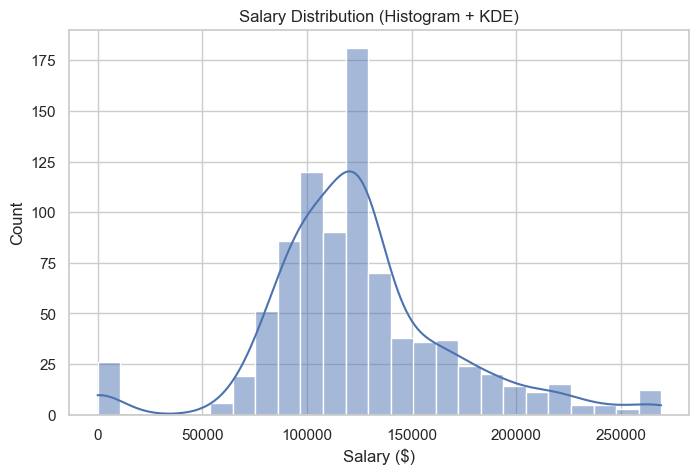

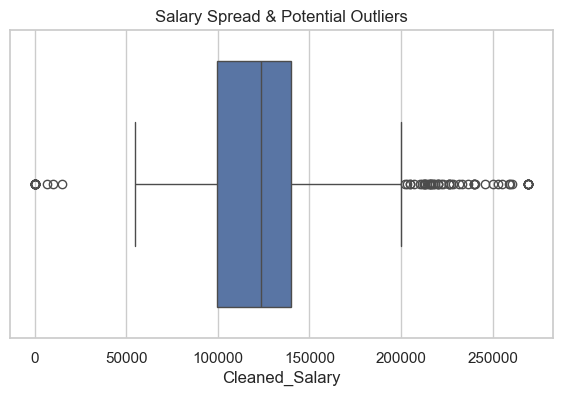

C:\Users\Al-Rayyan-Computer\AppData\Local\Temp\ipykernel_3780\2679580955.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Experience_Level', y='Cleaned_Salary', data=df, palette="Set2")


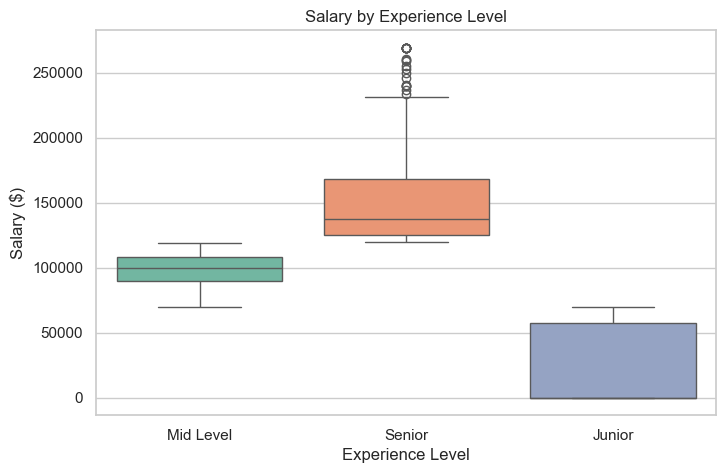

C:\Users\Al-Rayyan-Computer\AppData\Local\Temp\ipykernel_3780\2679580955.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")


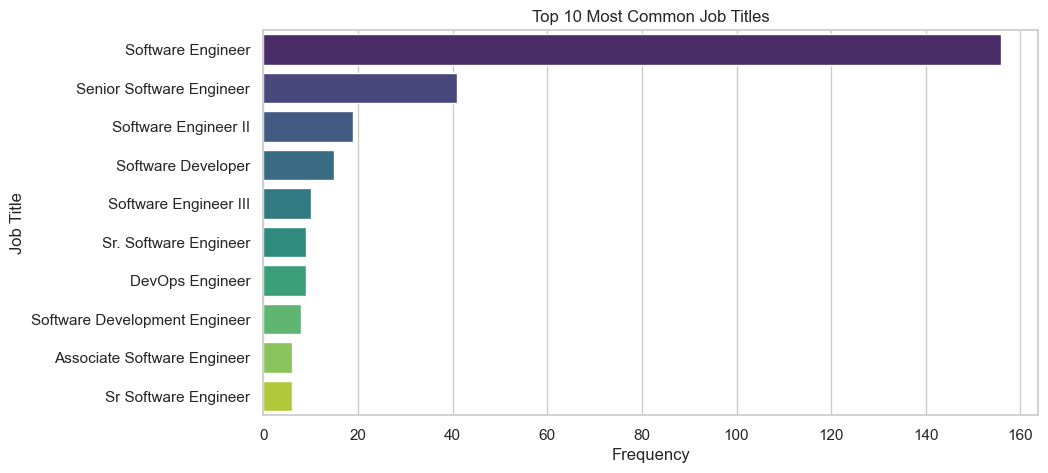

C:\Users\Al-Rayyan-Computer\AppData\Local\Temp\ipykernel_3780\2679580955.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_jobs.values, y=avg_salary_jobs.index, palette="coolwarm")


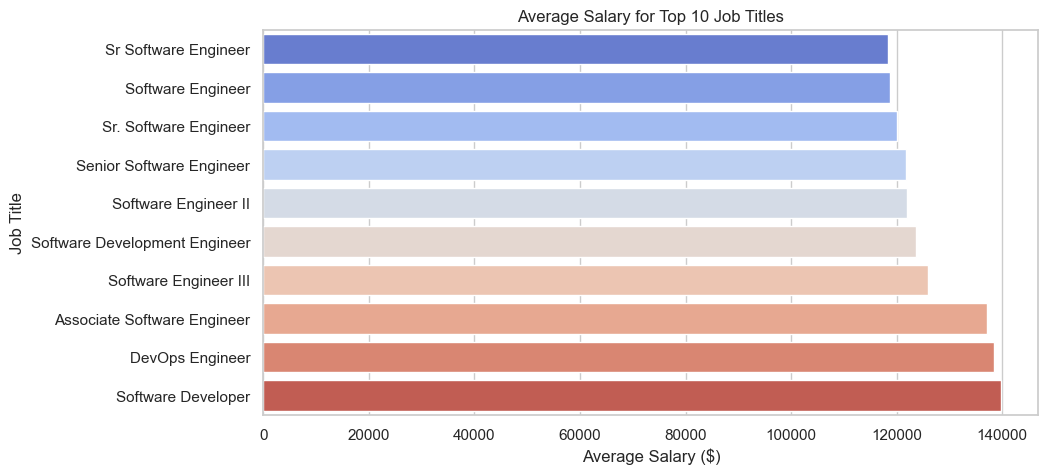

C:\Users\Al-Rayyan-Computer\AppData\Local\Temp\ipykernel_3780\2679580955.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_salary_locations.values, y=top_salary_locations.index, palette="mako")


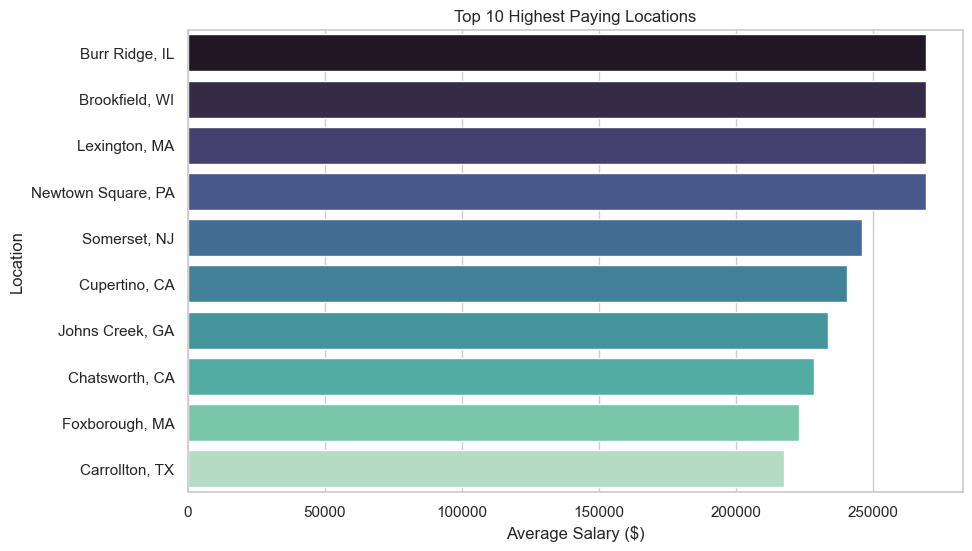

C:\Users\Al-Rayyan-Computer\AppData\Local\Temp\ipykernel_3780\2679580955.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Experience_Level', data=df, palette="husl")


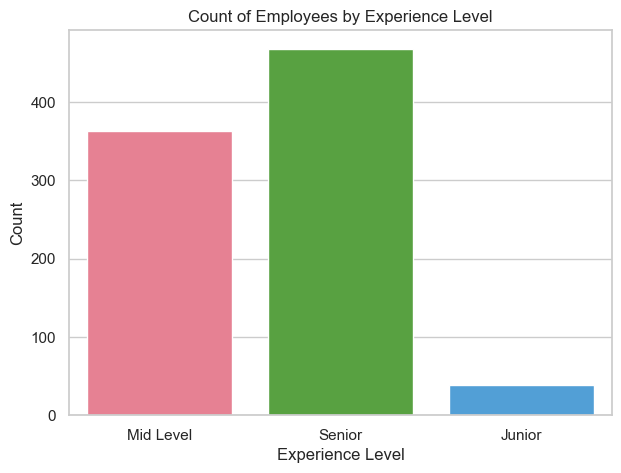

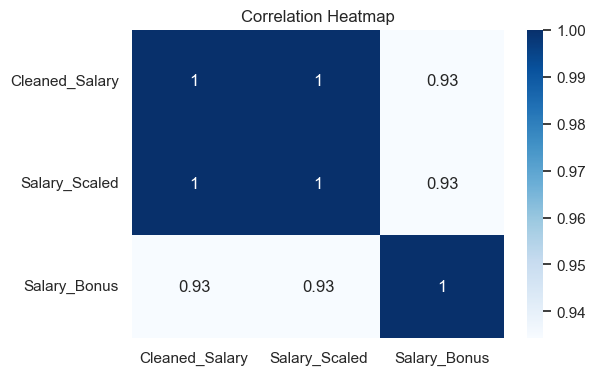

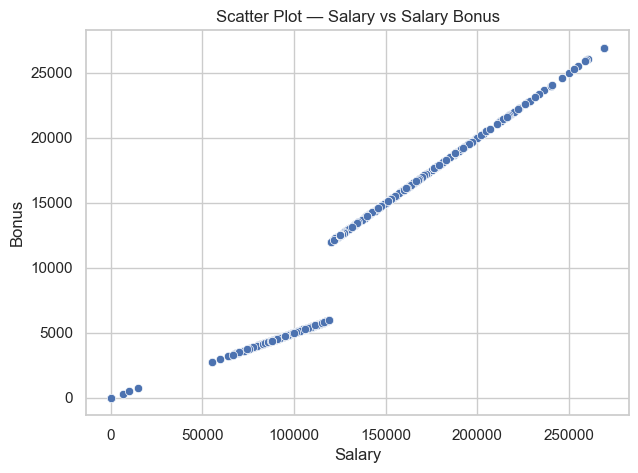

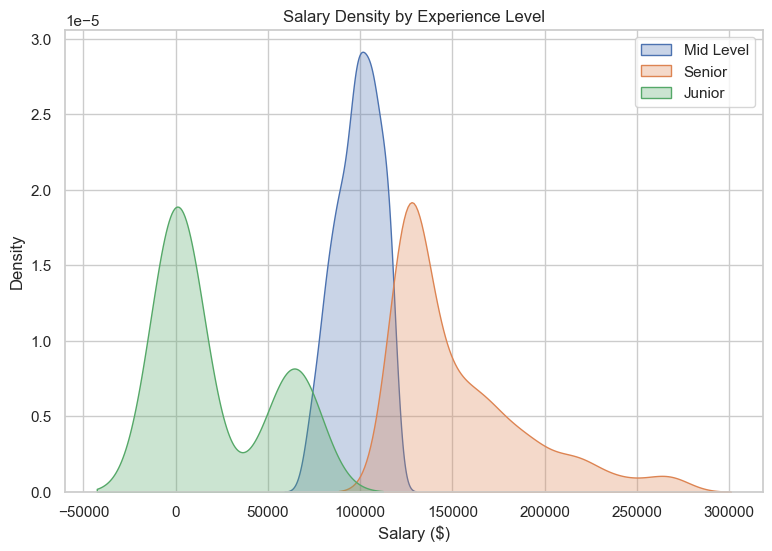


🎉 Phase 2 EDA completed successfully!


In [21]:
#      PHASE 2 — EXPLORATORY DATA ANALYSIS (EDA)


import matplotlib.pyplot as plt
import seaborn as sns

# Better plot styling
sns.set(style="whitegrid")

print("\n==============================")
print(" PHASE 2: EXPLORATORY DATA ANALYSIS")
print("==============================\n")


# 1. BASIC DESCRIPTIVE STATISTICS

print("\n📌 BASIC STATISTICS:")
print(df['Cleaned_Salary'].describe())


# 2. SALARY DISTRIBUTION (Histogram + KDE)

plt.figure(figsize=(8,5))
sns.histplot(df['Cleaned_Salary'], kde=True, bins=25)
plt.title("Salary Distribution (Histogram + KDE)")
plt.xlabel("Salary ($)")
plt.ylabel("Count")
plt.show()


# 3. BOX PLOT — Detect Spread & Outliers

plt.figure(figsize=(7,4))
sns.boxplot(x=df['Cleaned_Salary'])
plt.title("Salary Spread & Potential Outliers")
plt.show()


# 4. SALARY DISTRIBUTION BY EXPERIENCE LEVEL

plt.figure(figsize=(8,5))
sns.boxplot(x='Experience_Level', y='Cleaned_Salary', data=df, palette="Set2")
plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary ($)")
plt.show()


# 5. TOP 10 JOB TITLES — FREQUENCY

top_jobs = df['Job Title'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Frequency")
plt.ylabel("Job Title")
plt.show()


# 6. AVERAGE SALARY FOR TOP 10 JOB TITLES

top_jobs_list = df['Job Title'].value_counts().head(10).index
avg_salary_jobs = df[df['Job Title'].isin(top_jobs_list)].groupby('Job Title')['Cleaned_Salary'].mean().sort_values()

plt.figure(figsize=(10,5))
sns.barplot(x=avg_salary_jobs.values, y=avg_salary_jobs.index, palette="coolwarm")
plt.title("Average Salary for Top 10 Job Titles")
plt.xlabel("Average Salary ($)")
plt.ylabel("Job Title")
plt.show()


# 7. TOP PAYING LOCATIONS (Cities)

top_salary_locations = df.groupby("Location")['Cleaned_Salary'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_salary_locations.values, y=top_salary_locations.index, palette="mako")
plt.title("Top 10 Highest Paying Locations")
plt.xlabel("Average Salary ($)")
plt.ylabel("Location")
plt.show()


# 8. SALARY VS EXPERIENCE LEVEL (Count Plot)

plt.figure(figsize=(7,5))
sns.countplot(x='Experience_Level', data=df, palette="husl")
plt.title("Count of Employees by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.show()


# 9. CORRELATION HEATMAP (Numerical vars)

plt.figure(figsize=(6,4))
sns.heatmap(df[['Cleaned_Salary','Salary_Scaled','Salary_Bonus']].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


# 10. SCATTERPLOT — Salary vs Bonus

plt.figure(figsize=(7,5))
sns.scatterplot(x='Cleaned_Salary', y='Salary_Bonus', data=df)
plt.title("Scatter Plot — Salary vs Salary Bonus")
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.show()


# 11. KDE PLOT — Salary Density by Experience Level

plt.figure(figsize=(9,6))
for level in df['Experience_Level'].unique():
    subset = df[df['Experience_Level'] == level]
    sns.kdeplot(subset['Cleaned_Salary'], label=level, fill=True, alpha=0.3)

plt.title("Salary Density by Experience Level")
plt.xlabel("Salary ($)")
plt.legend()
plt.show()

print("\n🎉 Phase 2 EDA completed successfully!")



         PHASE 3: ML MODELING

Training samples: 696
Testing samples: 174

📌 MODEL: Linear Regression
RMSE: 30290.54
MAE: 23345.83
R² Score: 0.5524

📌 MODEL: Random Forest Regressor
RMSE: 34365.82
MAE: 25061.01
R² Score: 0.4238

📌 MODEL: XGBoost Regressor
RMSE: 34976.56
MAE: 25141.55
R² Score: 0.4031


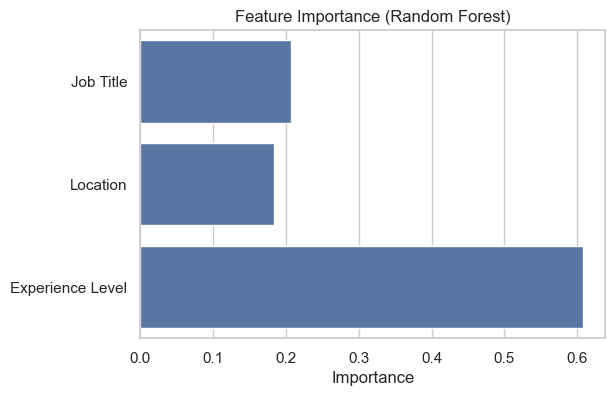


🎉 Phase 3 Machine Learning completed successfully!


In [25]:

#          PHASE 3 — MACHINE LEARNING PIPELINE


print("\n===================================")
print("         PHASE 3: ML MODELING")
print("===================================\n")


# IMPORT ML LIBRARIES

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Optional: install if missing
# !pip install xgboost
from xgboost import XGBRegressor


# STEP 1: ENCODING CATEGORICAL FEATURES

df_ml = df.copy()

label = LabelEncoder()

df_ml['Job_Title_Enc'] = label.fit_transform(df_ml['Job Title'])
df_ml['Location_Enc'] = label.fit_transform(df_ml['Location'])
df_ml['Experience_Enc'] = label.fit_transform(df_ml['Experience_Level'])


# STEP 2: SELECT FEATURES & TARGET

X = df_ml[['Job_Title_Enc', 'Location_Enc', 'Experience_Enc']]
y = df_ml['Cleaned_Salary']


# STEP 3: TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


# STEP 4: TRAIN MODELS


# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6)
xgb.fit(X_train, y_train)


# STEP 5: PREDICTIONS

lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)


# STEP 6: EVALUATION FUNCTION

def evaluate_model(true, pred, model_name):
    mse = mean_squared_error(true, pred)
    rmse = mse ** 0.5

    mae = mean_absolute_error(true, pred)
    r2 = r2_score(true, pred)

    print(f"\n📌 MODEL: {model_name}")
    print("RMSE:", round(rmse, 2))
    print("MAE:", round(mae, 2))
    print("R² Score:", round(r2, 4))



# STEP 7: DISPLAY RESULTS

evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test, rf_pred, "Random Forest Regressor")
evaluate_model(y_test, xgb_pred, "XGBoost Regressor")


# STEP 8: FEATURE IMPORTANCE (RANDOM FOREST)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(
    x=rf.feature_importances_,
    y=['Job Title', 'Location', 'Experience Level']
)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.show()

print("\n🎉 Phase 3 Machine Learning completed successfully!")


In [26]:
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Load cleaned data
df = pd.read_csv("Cleaned_Software_Engineer_Salaries-2.csv")

# Create separate encoders
job_encoder = LabelEncoder()
loc_encoder = LabelEncoder()
exp_encoder = LabelEncoder()

df['Job_Title_Enc'] = job_encoder.fit_transform(df['Job Title'])
df['Location_Enc'] = loc_encoder.fit_transform(df['Location'])
df['Experience_Enc'] = exp_encoder.fit_transform(df['Experience_Level'])

X = df[['Job_Title_Enc', 'Location_Enc', 'Experience_Enc']]
y = df['Cleaned_Salary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Save model & encoders
joblib.dump(rf, "salary_model.pkl")
joblib.dump(job_encoder, "job_encoder.pkl")
joblib.dump(loc_encoder, "location_encoder.pkl")
joblib.dump(exp_encoder, "experience_encoder.pkl")

print("✅ Model & encoders saved successfully")


✅ Model & encoders saved successfully


2025-12-23 09:31:15.194 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-23 09:31:15.197 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-23 09:31:15.693 
  command:

    streamlit run C:\Users\Al-Rayyan-Computer\AppData\Local\Programs\Python\Python314\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-23 09:31:15.696 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-23 09:31:15.698 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-23 09:31:15.701 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-23 09:31:15.703 Thread 'MainThread': missing ScriptRunCon